In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

np.random.seed(0)

In [44]:
def initialize_grid():
    grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
    grid[GRID_SIZE // 2, GRID_SIZE // 2] = 1  # The central cell is sick
    return grid


def apply_transition_rules(grid):
    new_grid = grid.copy()
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            neighbors = get_neighbors(grid, i, j)
            if grid[i, j] == 0 and any(n > 0 for n in neighbors) and np.random.rand() < P_INFECTION:
                new_grid[i, j] = 1
            elif 0 < grid[i, j] < DURATION_INFECTION:
                new_grid[i, j] += 1
            elif grid[i, j] == DURATION_INFECTION:
                new_grid[i, j] = -DURATION_IMMUNITY
            elif grid[i, j] < 0 and np.random.rand() < P_IMMUNITY_LOSS:
                new_grid[i, j] += 1
    return new_grid


def get_neighbors(grid, x, y):
    neighbors = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            if i == 0 and j == 0:
                continue
            ni, nj = (x + i) % GRID_SIZE, (y + j) % GRID_SIZE
            neighbors.append(grid[ni, nj])
    return neighbors


def collect_statistics(grid):
    stats = {
        'Healthy': np.sum(grid == 0),
        'Infected': np.sum(grid > 0),
        'Immune': np.sum(grid < 0)
    }
    return stats


def plot_grid(grid, step):
    color_map = mcolors.ListedColormap(['blue', 'green', 'red'])
    plt.figure(figsize=(6, 6))
    plt.pcolor(grid, cmap=color_map, edgecolors='k', linewidths=0.5, vmin=-DURATION_IMMUNITY, vmax=DURATION_INFECTION)
    plt.title(f"Step {step}")
    plt.axis('off')
    plt.show()


def plot_statistics(statistics):
    plt.figure(figsize=(10, 6))
    for key, values in statistics.items():
        plt.plot(values, label=key)
    plt.xlabel('Time Step')
    plt.ylabel('Count')
    plt.title('Epidemic Spread Over Time')
    plt.legend()
    plt.show()


def simulate_epidemic_spread():
    statistics = {'Immune': [], 'Infected': [], 'Healthy': []}
    grid = initialize_grid()
    for step in range(STEPS):
        grid = apply_transition_rules(grid)
        stats = collect_statistics(grid)
        for key in statistics:
            statistics[key].append(stats[key])
        if step < 30:
            plot_grid(grid, step)
    plot_statistics(statistics)

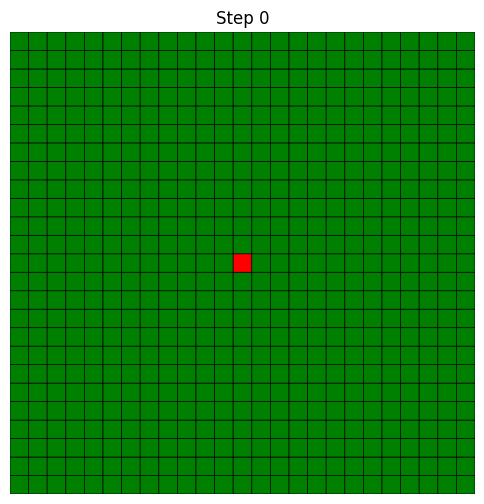

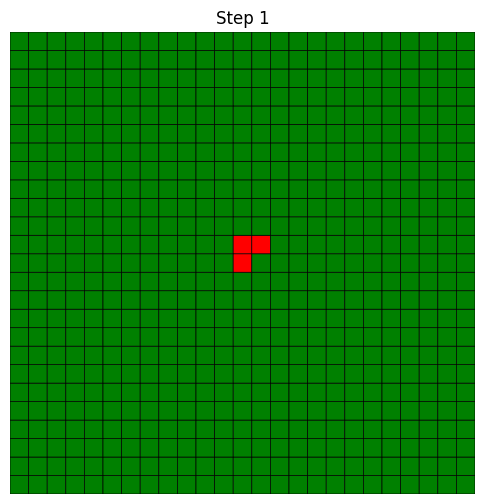

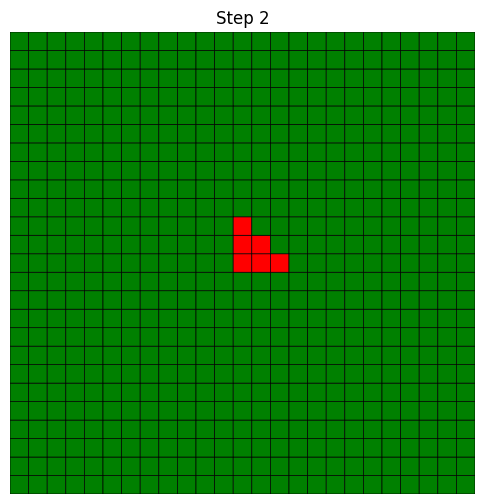

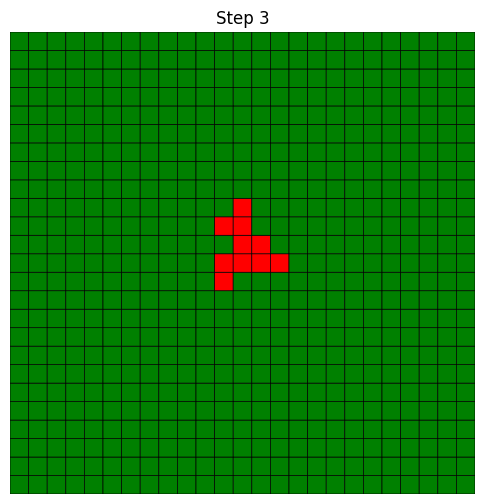

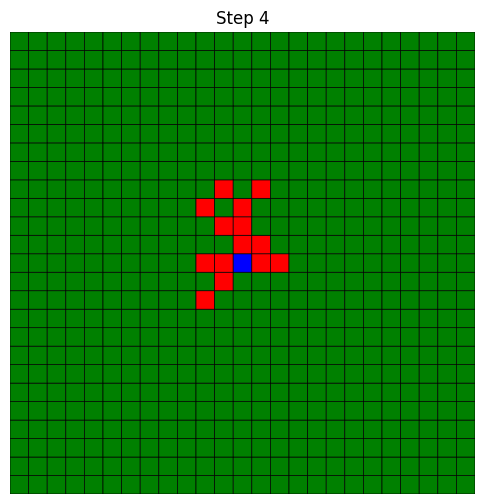

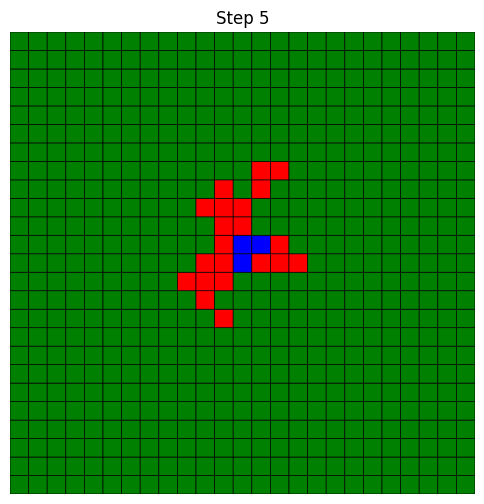

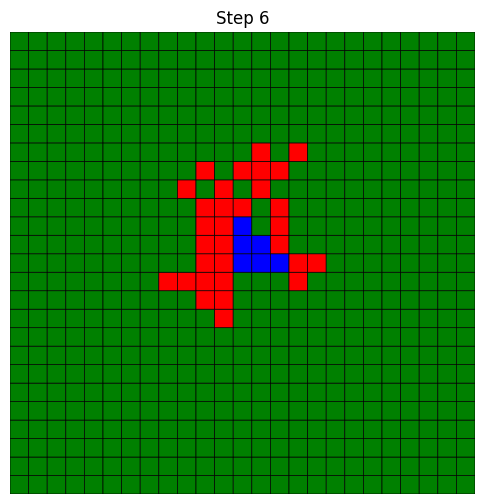

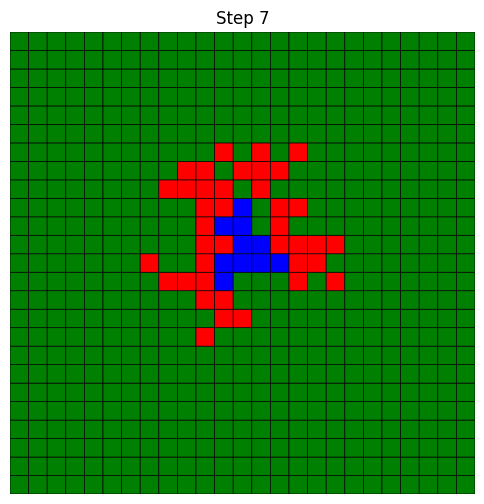

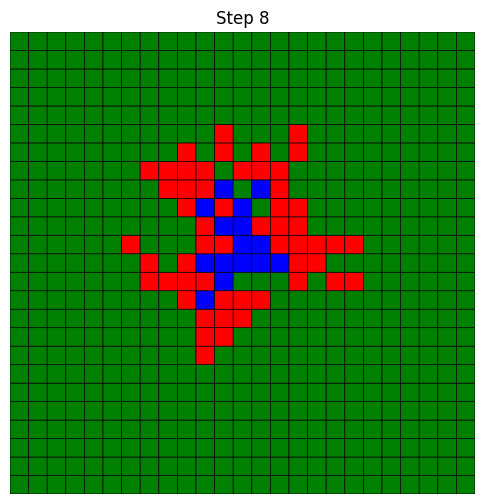

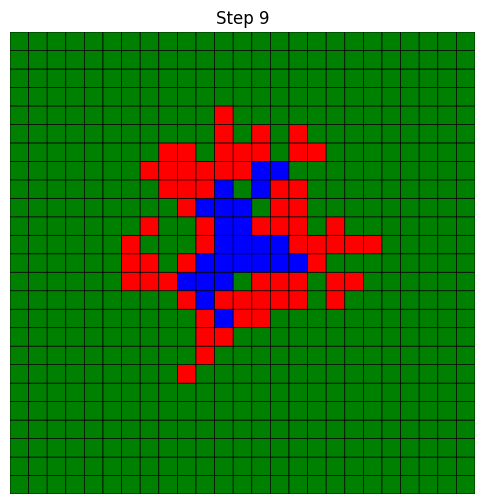

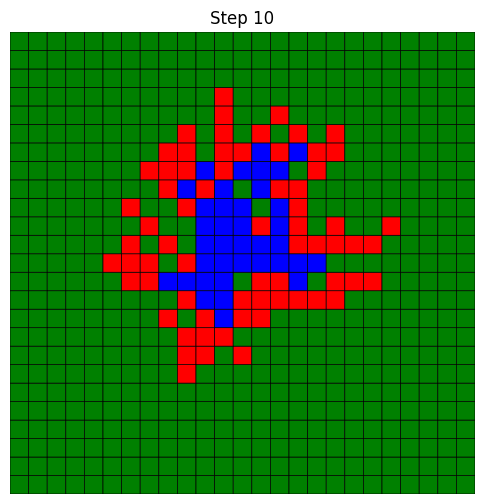

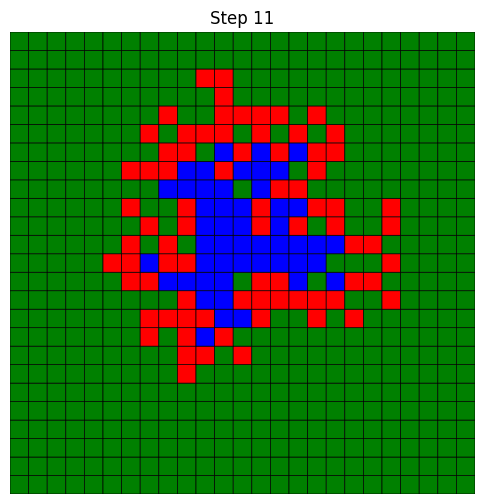

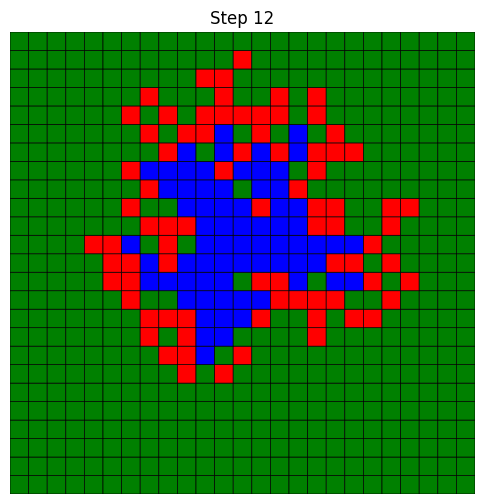

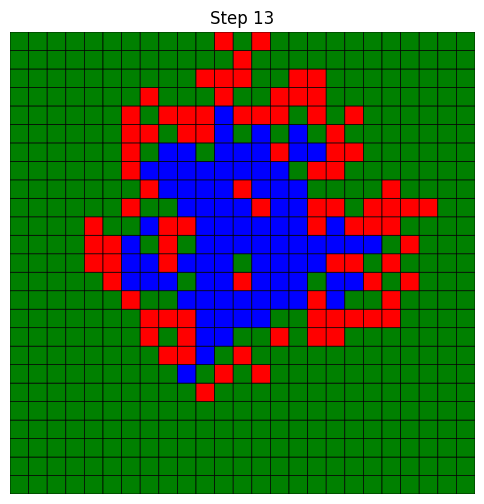

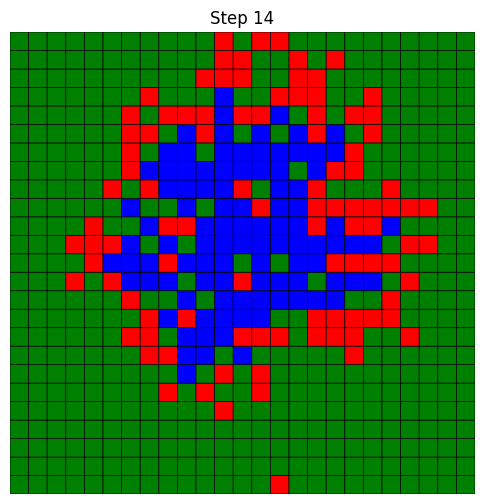

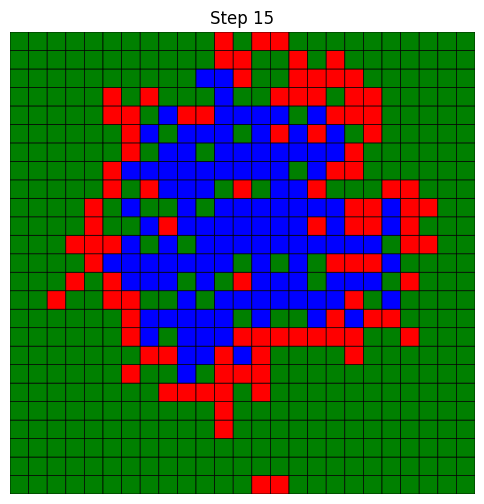

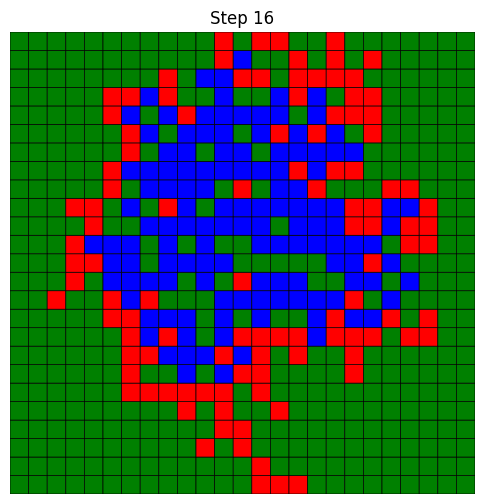

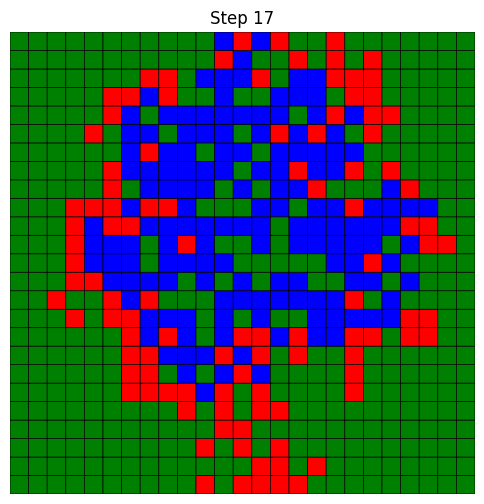

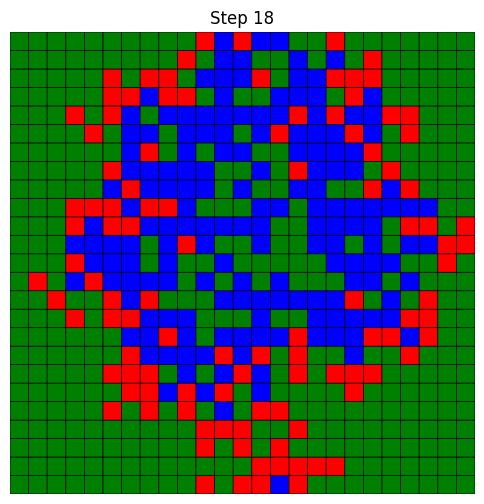

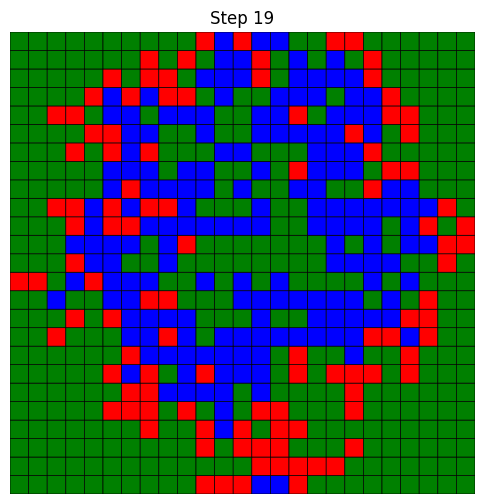

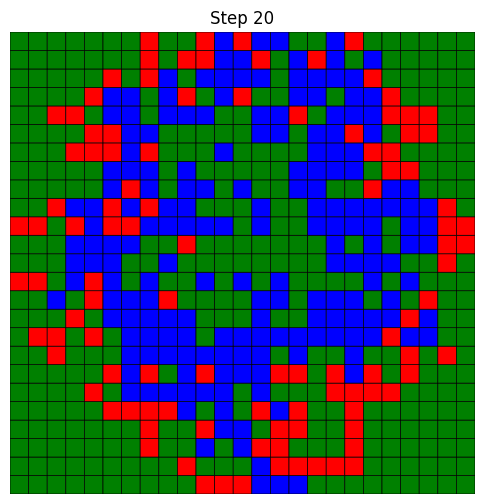

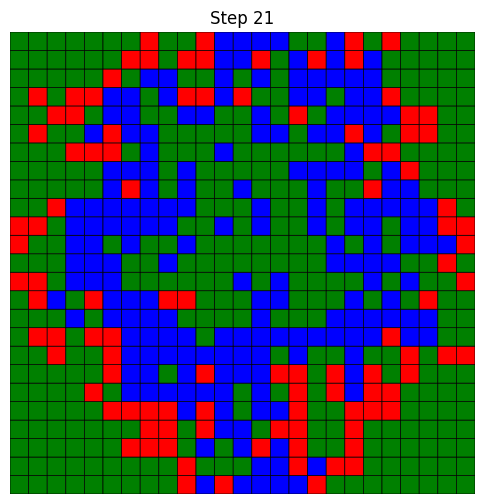

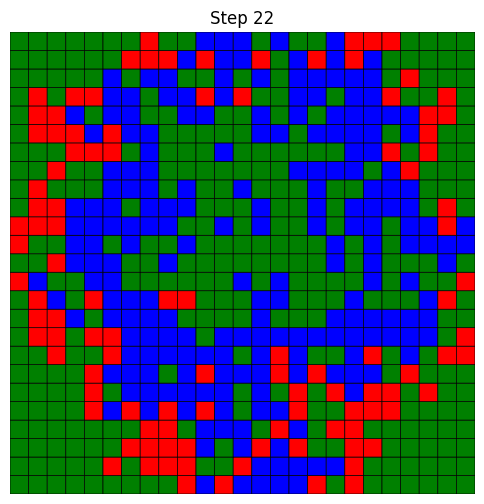

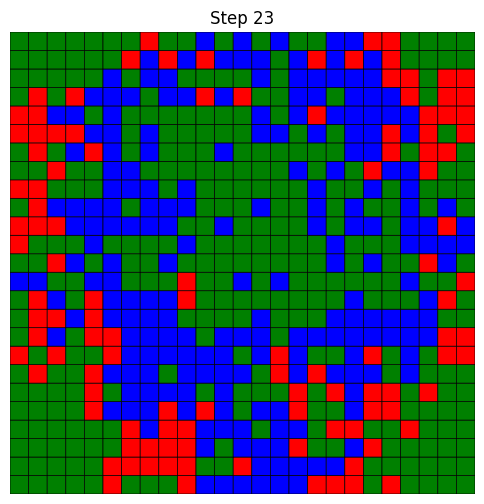

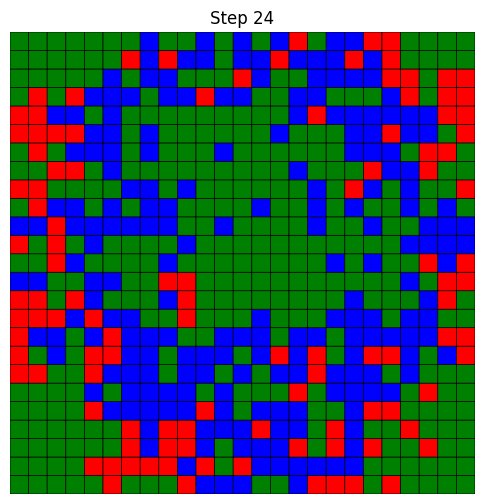

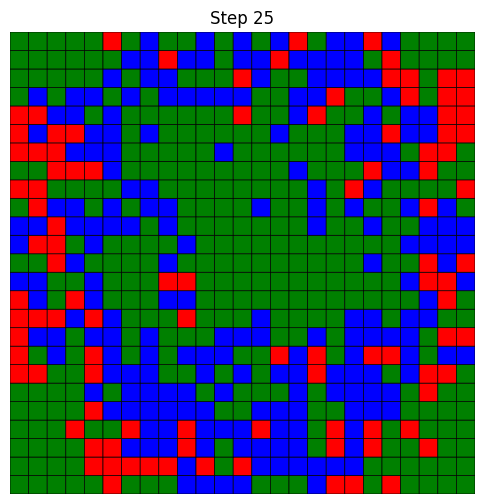

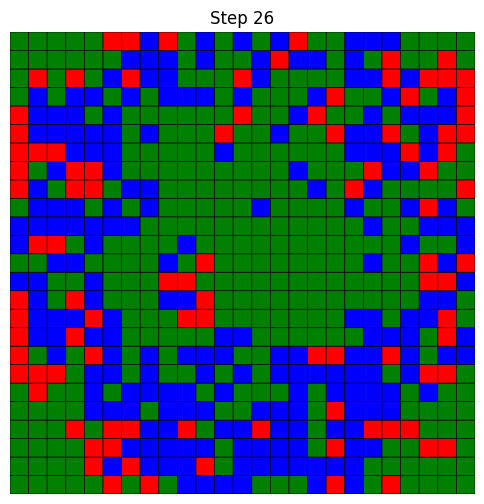

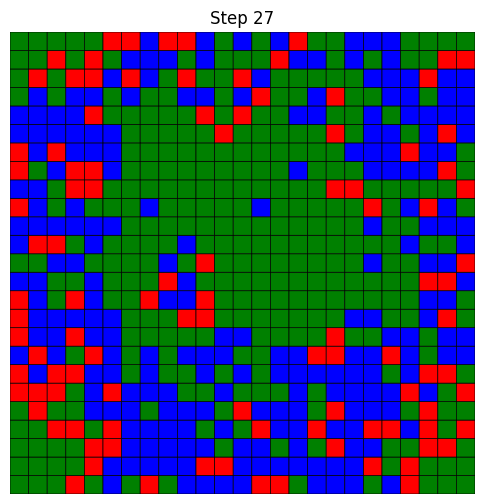

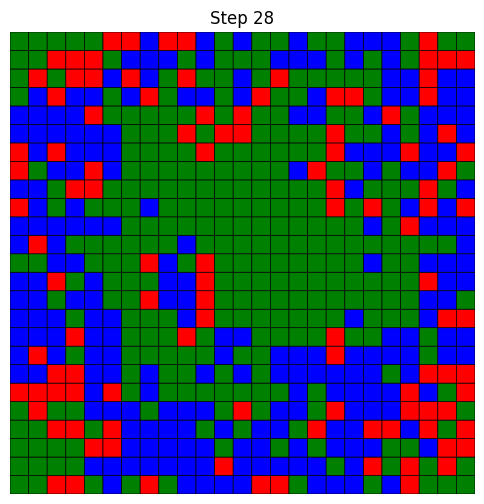

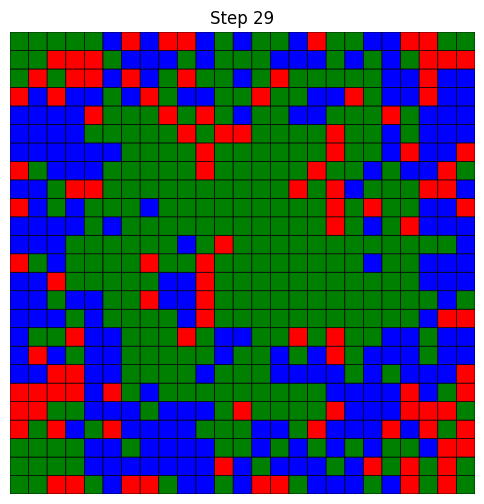

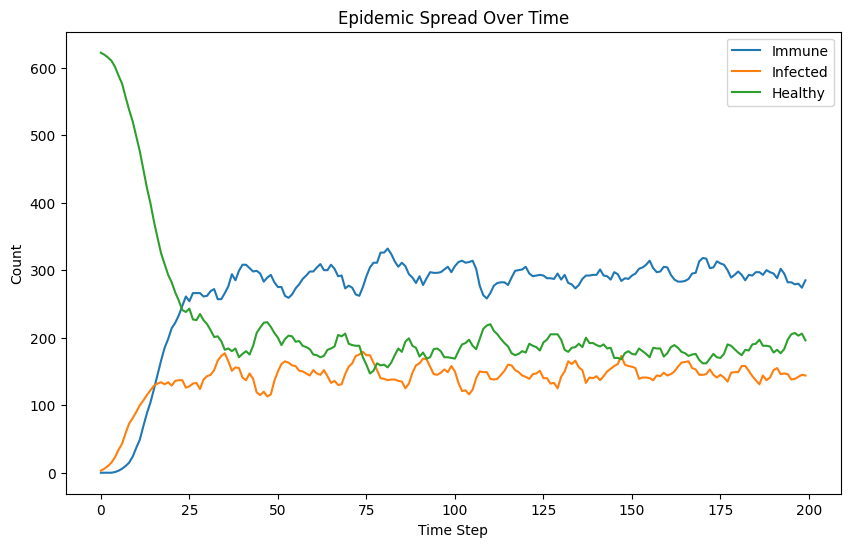

In [45]:
GRID_SIZE = 25
P_INFECTION = 0.2
P_IMMUNITY_LOSS = 0.5
DURATION_INFECTION = 5
DURATION_IMMUNITY = 5
STEPS = 200

simulate_epidemic_spread()